# chap 14 모델 성능 향상시키기

In [1]:
# 와인의 종류 예측하기
import pandas as pd

df = pd.read_csv('./data/wine.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
X = df.iloc[:, 0:12]
y = df.iloc[:, -1]

In [3]:
# 데이터를 학습용과 테스트용으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25)

#  모델 결과 출력
score = model.evaluate(X_test, y_test)
print("Test loss : ", score[0], "  Test accuracy : ", score[1])

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 1.2066 - accuracy: 0.6467 - val_loss: 1.1608 - val_accuracy: 0.7285
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.9568 - accuracy: 0.7601 - val_loss: 0.9169 - val_accuracy: 0.7285
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7351 - accuracy: 0.7424 - val_loss: 0.7204 - val_accuracy: 0.6815
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6421 - accuracy: 0.7052 - val_loss: 0.6308 - val_accuracy: 0.6977
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5388 - accuracy: 0.7395 - val_loss: 0.5522 - val_accuracy: 0.7277
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.7557 - val_loss: 0.4726 - val_accuracy: 0.7277
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4011 - accuracy: 0.7752 - val_loss: 0.4080 - val_accuracy: 0.7831
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.1286 - accuracy: 0.9536 - val_loss: 0.1582 - val_accuracy: 0.9385
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1263 - accuracy: 0.9556 - val_loss: 0.1593 - val_accuracy: 0.9385
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1237 - accuracy: 0.9569 - val_loss: 0.1522 - val_accuracy: 0.9369
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1210 - accuracy: 0.9569 - val_loss: 0.1507 - val_accuracy: 0.9385
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1203 - accuracy: 0.9574 - val_loss: 0.1491 - val_accuracy: 0.9408
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1186 - accuracy: 0.9579 - val_loss: 0.1531 - val_accuracy: 0.9400
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9595 - val_loss: 0.1465 - val_accuracy: 0.9400
Epoch 66/100
8/8 [===============

In [7]:
# checkpoint를 통해 모델 업데이트
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# epoch 실행시 마다 모델을 파일로 저장
model_path = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=True)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 : callbacks 를 설정 
model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25,
         callbacks=[checkpointer], verbose=0)

In [15]:
print(model.history.history['accuracy'].index(max(model.history.history['accuracy'])))
print(max(model.history.history['accuracy']))

96
0.9792147874832153


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('./data/model/all/96-0.9685.hdf5')

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,verbose=0)

In [20]:
import pandas as pd

hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.481003,0.725173,0.414972,0.788462
1,0.355704,0.831665,0.366749,0.846923
2,0.304358,0.875289,0.310791,0.883846
3,0.264639,0.911984,0.275912,0.917692
4,0.238735,0.928663,0.253990,0.919231


In [21]:
# 그래프로 확인 ( 에러 -> 손실함수의 결과 )
import matplotlib.pyplot as plt
import numpy as np

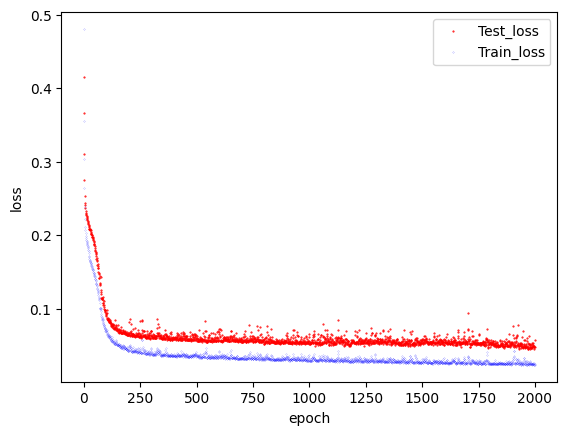

In [24]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, "o", markersize= 0.5, c='red', label='Test_loss')
plt.plot(x_len, y_loss, "o", markersize= 0.1,c='blue', label='Train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
#  중단점 설정
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 중단점과 저장 설정
early_stopping_callback = EarlyStopping(patience=20)
checkpointer = ModelCheckpoint(filepath=model_path, verbose=0, save_best_only=True)

# 모델 실행 : callbacks 를 설정 
model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,
         callbacks=[ early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 24ms/step - loss: 0.2774 - accuracy: 0.8945 - val_loss: 0.2773 - val_accuracy: 0.9269
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2258 - accuracy: 0.9343 - val_loss: 0.2461 - val_accuracy: 0.9177
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.2021 - accuracy: 0.9328 - val_loss: 0.2345 - val_accuracy: 0.9154
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1917 - accuracy: 0.9353 - val_loss: 0.2280 - val_accuracy: 0.9146
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1832 - accuracy: 0.9351 - val_loss: 0.2168 - val_accuracy: 0.9185
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1791 - accuracy: 0.9358 - val_loss: 0.2115 - val_accuracy: 0.9192
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1749 - accuracy: 0.9400 - val_loss: 0.2054 - val_accuracy: 0.9223
Epoch 8/2000
8/8 [=

8/8 [==============================] - 0s 8ms/step - loss: 0.0914 - accuracy: 0.9682 - val_loss: 0.1262 - val_accuracy: 0.9523
Epoch 60/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0895 - accuracy: 0.9713 - val_loss: 0.1369 - val_accuracy: 0.9408
Epoch 61/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0902 - accuracy: 0.9707 - val_loss: 0.1250 - val_accuracy: 0.9515
Epoch 62/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0877 - accuracy: 0.9707 - val_loss: 0.1230 - val_accuracy: 0.9531
Epoch 63/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0873 - accuracy: 0.9723 - val_loss: 0.1220 - val_accuracy: 0.9569
Epoch 64/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0863 - accuracy: 0.9720 - val_loss: 0.1206 - val_accuracy: 0.9577
Epoch 65/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0854 - accuracy: 0.9741 - val_loss: 0.1252 - val_accuracy: 0.9446
Epoch 66/2000
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9782 - val_loss: 0.0850 - val_accuracy: 0.9715
Epoch 118/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0607 - accuracy: 0.9802 - val_loss: 0.0807 - val_accuracy: 0.9731
Epoch 119/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0601 - accuracy: 0.9810 - val_loss: 0.0803 - val_accuracy: 0.9723
Epoch 120/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0629 - accuracy: 0.9784 - val_loss: 0.0843 - val_accuracy: 0.9723
Epoch 121/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0632 - accuracy: 0.9790 - val_loss: 0.0887 - val_accuracy: 0.9731
Epoch 122/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.0893 - val_accuracy: 0.9708
Epoch 123/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9790 - val_loss: 0.0805 - val_accuracy: 0.9715
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9849 - val_loss: 0.0721 - val_accuracy: 0.9746
Epoch 176/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9818 - val_loss: 0.0657 - val_accuracy: 0.9808
Epoch 177/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0652 - val_accuracy: 0.9800
Epoch 178/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0694 - val_accuracy: 0.9762
Epoch 179/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0683 - val_accuracy: 0.9762
Epoch 180/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0650 - val_accuracy: 0.9800
Epoch 181/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0658 - val_accuracy: 0.9792
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0608 - val_accuracy: 0.9838
Epoch 234/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0642 - val_accuracy: 0.9792
Epoch 235/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.0785 - val_accuracy: 0.9738
Epoch 236/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9815 - val_loss: 0.0804 - val_accuracy: 0.9715
Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0620 - val_accuracy: 0.9800
Epoch 238/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0614 - val_accuracy: 0.9831
Epoch 239/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.0605 - val_accuracy: 0.9846
Epoch 